In [3]:
import pandas as pd

data = pd.read_csv('/content/winequality-red.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.isna().sum() # no null values in the dataset

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


<ipython-input-6-863434b9a43c>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist = data.hist(bins=1, ax=axes)


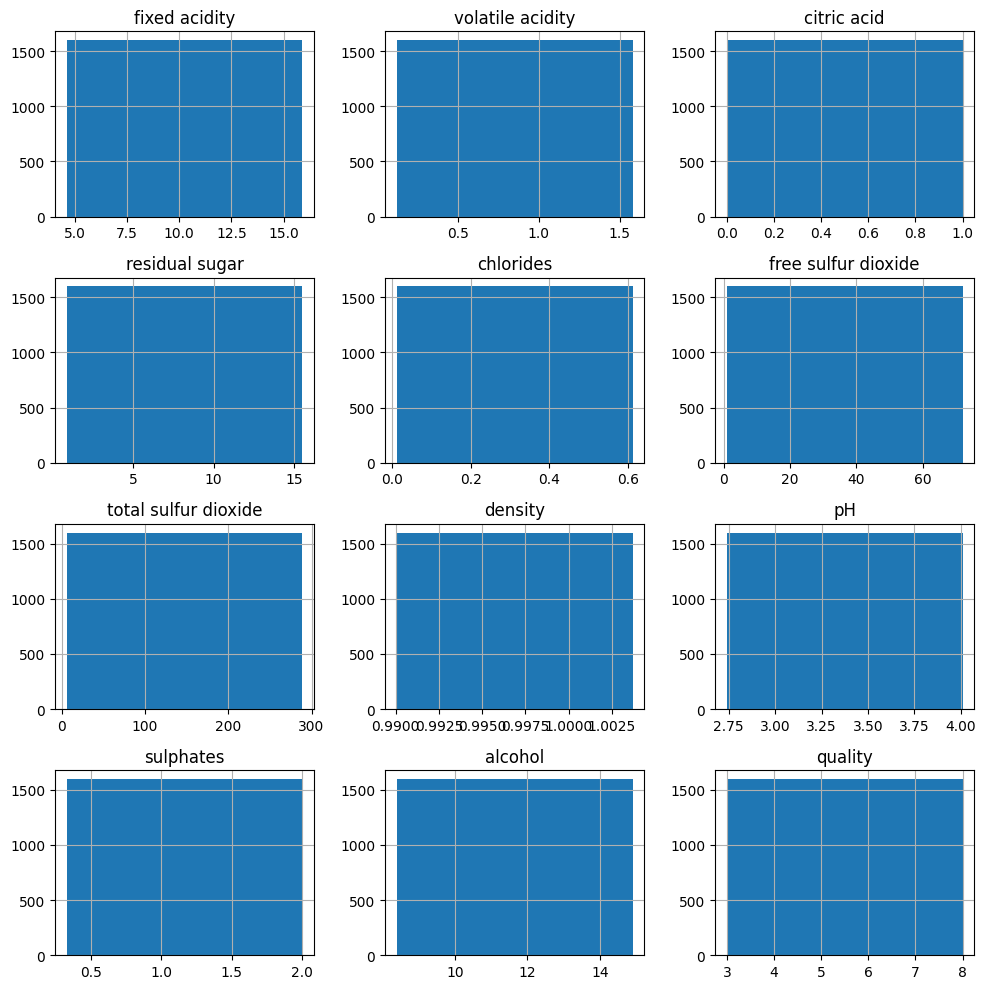

In [6]:
# WHAT I'LL DO IS USE BOTH LINEAR AND RANDOM FOREST TO PREDICT, AND THEN COMPARE. BONUS -> CONVERT QUALITY TO TRUE, FALSE FOR CLASSIFIER.

import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize = (10, 10))
hist = data.hist(bins=1, ax=axes)
plt.tight_layout()
plt.show() # This maybe the bin problem, but the data appears to be very uniformly distributed, no outliers as such.

In [7]:
data.describe() # most means are either ~50% or between 50% and 75%

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data.corr()["quality"] # So as no value is close to 1, and many are < 0, there is not much linearity in the data.

,quality
fixed acidity,0.124052
volatile acidity,-0.390558
citric acid,0.226373
residual sugar,0.013732
chlorides,-0.128907
free sulfur dioxide,-0.050656
total sulfur dioxide,-0.185100
density,-0.174919
pH,-0.057731
sulphates,0.251397


<Axes: >

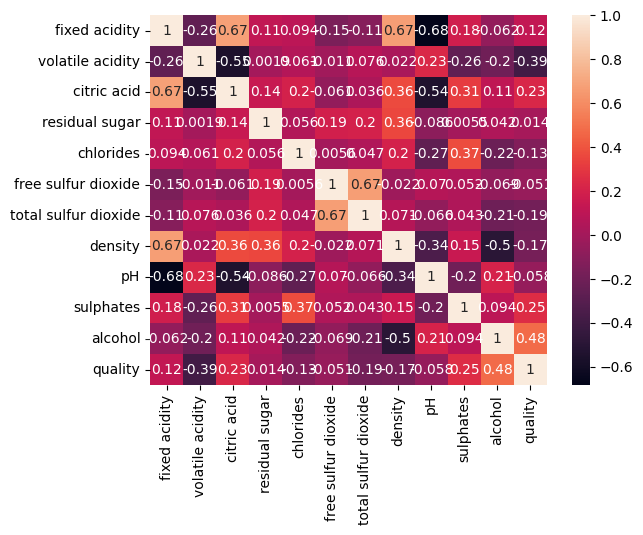

In [9]:
import seaborn as sns
c = data.corr()

sns.heatmap(c, annot=True)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standard = StandardScaler()

X = data.drop(columns = "quality")
Y = data["quality"]

X_scaled = standard.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=100)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=1)


def ml(model):

  model.fit(X_train, Y_train)
  Y_train_pred = model.predict(X_train)
  Y_test_pred = model.predict(X_test)

  return Y_train_pred, Y_test_pred

In [36]:
import numpy as np

Y_lr_train_pred, Y_lr_test_pred = ml(lr)
Y_rf_train_pred, Y_rf_test_pred = ml(rf)

from sklearn.metrics import mean_absolute_error, r2_score

lr_train_mae = mean_absolute_error(Y_train, Y_lr_train_pred)
lr_test_mae = mean_absolute_error(Y_test, Y_lr_test_pred)
lr_train_r2 = r2_score(Y_train, Y_lr_train_pred)
lr_test_r2 = r2_score(Y_test, Y_lr_test_pred)

rf_train_mae = mean_absolute_error(Y_train, Y_rf_train_pred)
rf_test_mae = mean_absolute_error(Y_test, Y_rf_test_pred)
rf_train_r2 = r2_score(Y_train, Y_rf_train_pred)
rf_test_r2 = r2_score(Y_test, Y_rf_test_pred)

LR_metrics = np.array([lr_train_mae, lr_test_mae, lr_train_r2, lr_test_r2])
RF_metrics = np.array([rf_train_mae, rf_test_mae, rf_train_r2, rf_test_r2])

In [37]:
LR_metrics

array([0.50180653, 0.49686386, 0.36838726, 0.3175559 ])

In [38]:
RF_metrics

array([0.53667624, 0.55119252, 0.34778439, 0.23259869])

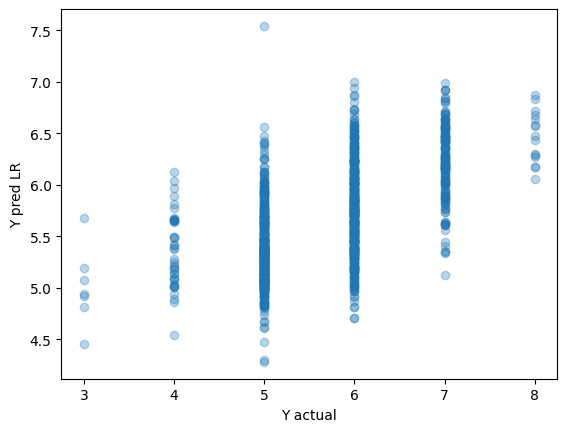

In [49]:
import matplotlib.pyplot as plt

plt.scatter(Y_train, Y_lr_train_pred, alpha=0.3)
plt.xlabel("Y actual")
plt.ylabel("Y pred LR")
plt.show() # No Liniarity

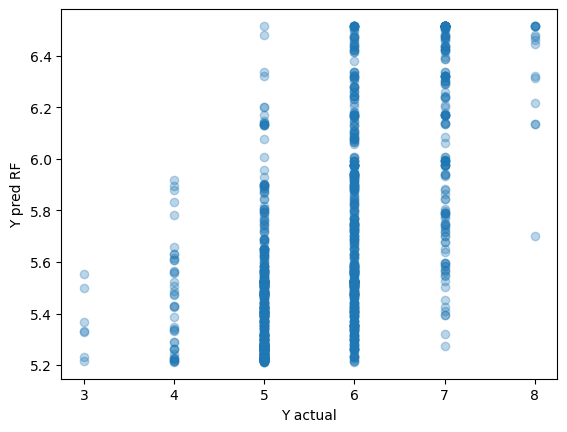

In [50]:
import matplotlib.pyplot as plt

plt.scatter(Y_train, Y_rf_train_pred, alpha=0.3)
plt.xlabel("Y actual")
plt.ylabel("Y pred RF")
plt.show() # Very similar to LR model

In [58]:
bool_res = []

for i in range(data.shape[0]):

  if data["quality"][i] <= 5:
    bool_res.append(0)
  else:
    bool_res.append(1)

data["quality_bool"] = bool_res

data.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bool
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [59]:
data["quality_bool"].value_counts()

,count
quality_bool,
1,855
0,744


In [60]:
X_classifier = data.drop(columns = ["quality", "quality_bool"])
X_classifier

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [61]:
Y_classifier = data["quality_bool"]

X_classifier_train, X_classifier_test, Y_classifier_train, Y_classifier_test = train_test_split(X_classifier, Y_classifier, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=2, random_state=1)
rfc.fit(X_classifier_train, Y_classifier_train)

Y_classifier_pred = rfc.predict(X_classifier_test)

In [62]:
from sklearn.metrics import accuracy_score, precision_score

accuracy = accuracy_score(Y_classifier_test, Y_classifier_pred)
precision = precision_score(Y_classifier_test, Y_classifier_pred)

print(accuracy) # how many it correctly predicted.
print(precision) # out of the ones which were 1/True, how many did it predict True.

0.765625
0.7593582887700535


In [63]:
combined = pd.DataFrame(dict(actual=Y_classifier_test, predicted=Y_classifier_pred))
combined

,actual,predicted
1254,0,1
1087,1,1
822,0,0
1514,1,0
902,1,1
...,...,...
903,1,1
1512,1,1
941,1,1
1190,1,1


In [64]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,103,45
1,30,142


<Axes: xlabel='predicted', ylabel='actual'>

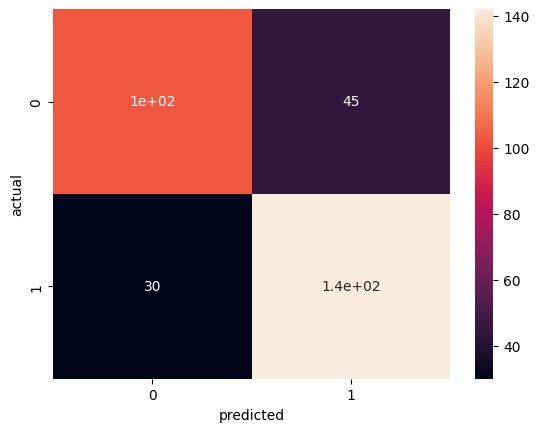

In [66]:
sns.heatmap(pd.crosstab(index=combined["actual"], columns=combined["predicted"]), annot=True)

In [65]:
from sklearn.metrics import recall_score, f1_score

recall = recall_score(Y_classifier_test, Y_classifier_pred)
f1 = f1_score(Y_classifier_test, Y_classifier_pred)

print(recall) # how much percentage of true-positives were predicted correctly.
print(f1) # harmonic mean of precsion and recall. Balances the model.

0.8255813953488372
0.7910863509749304


In [ ]:
# The Random Classifier method is an above-average model for this dataset, and is good at predicting 'good' quality.